In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import collections
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
nltk.downloader.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Reading in the data
We have 2 data frames for lyrics and audio features. We want to clean and create one data frame with both of these features.

In [3]:
df=pd.read_csv("lyrics-v5.csv")
df3=pd.read_csv("bts_song_features_224.csv")

In [4]:
df3.rename(columns = {'track_popularity':'popularity'}, inplace = True)
df3.head()

,Unnamed: 0,album_id,album_title,album_rd,album_seq,track_id,track_name,popularity,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,6egaEe9JaULuUCkihSnYlH,2 Cool 4 Skool,2013-06-12,1,1UlnDZ5ubsSX3xrXu063dZ,Intro: 2 Cool 4 Skool,51,0.894,0.835,...,0.179,0.532,94.871,audio_features,1UlnDZ5ubsSX3xrXu063dZ,spotify:track:1UlnDZ5ubsSX3xrXu063dZ,https://api.spotify.com/v1/tracks/1UlnDZ5ubsSX...,https://api.spotify.com/v1/audio-analysis/1Uln...,63787,4
1,1,6egaEe9JaULuUCkihSnYlH,2 Cool 4 Skool,2013-06-12,2,5pjHS3EpHurMyIpB2QBnEd,We Are Bulletproof Pt.2,65,0.753,0.950,...,0.134,0.868,144.020,audio_features,5pjHS3EpHurMyIpB2QBnEd,spotify:track:5pjHS3EpHurMyIpB2QBnEd,https://api.spotify.com/v1/tracks/5pjHS3EpHurM...,https://api.spotify.com/v1/audio-analysis/5pjH...,223933,4
2,2,6egaEe9JaULuUCkihSnYlH,2 Cool 4 Skool,2013-06-12,3,4Ut6UU8Yyihz1jCZWSCQpu,Skit: Circle Room Talk,44,0.598,0.356,...,0.913,0.817,121.045,audio_features,4Ut6UU8Yyihz1jCZWSCQpu,spotify:track:4Ut6UU8Yyihz1jCZWSCQpu,https://api.spotify.com/v1/tracks/4Ut6UU8Yyihz...,https://api.spotify.com/v1/audio-analysis/4Ut6...,131907,3
3,3,6egaEe9JaULuUCkihSnYlH,2 Cool 4 Skool,2013-06-12,4,089PFeXotzDLNQz9NCk6pF,No More Dream,66,0.438,0.864,...,0.431,0.594,167.898,audio_features,089PFeXotzDLNQz9NCk6pF,spotify:track:089PFeXotzDLNQz9NCk6pF,https://api.spotify.com/v1/tracks/089PFeXotzDL...,https://api.spotify.com/v1/audio-analysis/089P...,222067,4
4,4,6egaEe9JaULuUCkihSnYlH,2 Cool 4 Skool,2013-06-12,5,2QVXLAI2Io3tDmhFOSumr0,Interlude,51,0.914,0.276,...,0.392,0.854,125.897,audio_features,2QVXLAI2Io3tDmhFOSumr0,spotify:track:2QVXLAI2Io3tDmhFOSumr0,https://api.spotify.com/v1/tracks/2QVXLAI2Io3t...,https://api.spotify.com/v1/audio-analysis/2QVX...,52440,4


In [41]:
df3.columns

Index(['Unnamed: 0', 'album_id', 'album_title', 'album_rd', 'album_seq',
       'track_id', 'track_name', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [5]:
df.head()

,id,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver
0,0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False
1,1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False
2,2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False
3,3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False
4,4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False


### Clean the data frames
The separate lyrics and audio features data frames are mismatching. We reordered and dropped columns to prepare the data frames for merging.

In [6]:
df.drop([7,8],inplace=True)
df.reset_index(inplace=True)
df.id = df.id.astype(float)
df.id[75]=81.5
df.sort_values(by=['id'],inplace=True)
df.drop([136,137,149],inplace=True)
df.reset_index(drop=True,inplace=True)
df.drop([172,180],inplace=True)
df.reset_index(inplace=True)
df.id[185]=191.5
df.sort_values(by=['id'],inplace=True)
df.id[213]=205.2
df.id[214]=205.3
df.id[215]=205.4
df.id[216]=205.5
df.id[217]=205.6
df.id[218]=205.7
df.id[219]=205.8
df.id[220]=205.9
df.sort_values(by=['id'],inplace=True)
df.reset_index(drop=True)
df.drop(columns=['level_0','index','id'],inplace=True)

<ipython-input-6-3a5a23eda569>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[75]=81.5
<ipython-input-6-3a5a23eda569>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[185]=191.5
<ipython-input-6-3a5a23eda569>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[213]=205.2
<ipython-input-6-3a5a23eda569>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

### Merge the data frames

In [7]:
popular = df3.popularity
df_merged = pd.concat([df,popular], axis = 1)
df_merged.head()

,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver,popularity
0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False,51
1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False,65
2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False,44
3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False,66
4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False,51


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  3.,  0.,  5.,  5.,
         8., 11.,  8.,  2.,  3.,  2.,  6.,  4., 15.,  3., 11.,  6.,  5.,
        13.,  9., 10.,  2.,  8.,  4.,  6.,  8.,  6., 15.,  8., 10.,  8.,
         2.,  7.,  1.,  3.,  1.,  0.,  1.,  0.,  0.,  0.,  2.]),
 array([29.  , 30.14, 31.28, 32.42, 33.56, 34.7 , 35.84, 36.98, 38.12,
        39.26, 40.4 , 41.54, 42.68, 43.82, 44.96, 46.1 , 47.24, 48.38,
        49.52, 50.66, 51.8 , 52.94, 54.08, 55.22, 56.36, 57.5 , 58.64,
        59.78, 60.92, 62.06, 63.2 , 64.34, 65.48, 66.62, 67.76, 68.9 ,
        70.04, 71.18, 72.32, 73.46, 74.6 , 75.74, 76.88, 78.02, 79.16,
        80.3 , 81.44, 82.58, 83.72, 84.86, 86.  ]),
 <a list of 50 Patch objects>)

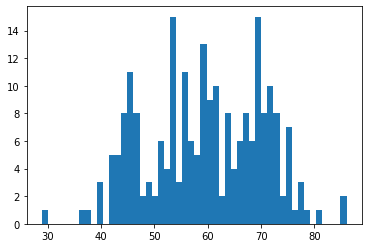

In [8]:
df=df_merged

### Removing rows with no lyrics

In [9]:
df = df[df['lyrics'].notna()]
df.reset_index(inplace=True)
df.drop(columns="index",inplace=True)
df.head()

C:\Users\sarah\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver,popularity
0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False,51
1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False,65
2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False,44
3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False,66
4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,6,좋아요 (I Like It),좋아요,I Like It,wanna be loved…\n\ndon’t wanna be fool wanna b...,False,False,NaN,BTS,False,KOR,False,74


## Sentiment Analysis

In [10]:
sentiment_scores=[]
most_common_words=[]
allWords2=[]
for i in range(len(df.lyrics)):
    
    
    #VADER sentiment score 
    sia = SentimentIntensityAnalyzer()
    sentiment_scores.append(sia.polarity_scores(df.lyrics[i]))
    
    #tokenizing - turning a text string to a list of words
    
    text = df.lyrics[i]
    text = text.replace(',',"")
    text = text.replace('(',"")
    text = text.replace(')',"")
    text = text.replace('\'',"")
    text = text.replace('’',"")
    text = text.replace('?',"")
    text = text.replace('*',"")
    text = text.replace('.',"")
    text = text.replace('!',"")
    text = text.replace(':',"")
    text = text.replace('-'," ")
    
    allWords = nltk.tokenize.word_tokenize(text)
    
    #lemmatizing - cutting words down to their roots
    
    wordnet_lemmatizer = WordNetLemmatizer()
    
    allWords2=[]
    
    for word in allWords:
        allWords2.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
    
    
    #finding most common words in lyrics
    #allWords = nltk.tokenize.word_tokenize(df.lyrics[i])
    allWordDist = nltk.FreqDist(w.lower() for w in allWords2)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords2 if w not in stopwords)  
    

    #print(allWords)

    counter = collections.Counter(allWordExceptStopDist)

    top10=(counter.most_common()[1:11])

    most_common_words.append(top10)
    
    counter.clear()
    
    
    
    

In [11]:
df_senti=pd.DataFrame(sentiment_scores)
df_sentiment=df.join(df_senti)
df_common=pd.DataFrame(most_common_words)
df_final=df_sentiment.join(df_common)
df_final.drop(columns=["kor_track_title","album_title","hidden_track","featured","remix","repackaged","lang","has_full_ver","album_seq","track_title"],inplace=True)
df_final.head()

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,0,1,2,3,4,5,6,7,8,9
0,2 Cool 4 Skool,2013-06-12,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,RM,51,0.029,0.638,0.333,0.9719,"(cool, 8)","(4, 4)","(skool, 4)","(exclusive, 2)","(n, 2)","(teenagers, 2)","(10s, 2)","(20s, 2)","(let, 2)","(talk, 2)"
1,2 Cool 4 Skool,2013-06-12,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,BTS,65,0.083,0.797,0.121,0.9723,"(click, 16)","(bang, 16)","(like, 11)","(bulletproof, 10)","(sing, 10)","(go, 6)","(much, 6)","(give, 4)","(look, 4)","(throw, 4)"
2,2 Cool 4 Skool,2013-06-12,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,BTS,44,0.093,0.769,0.138,0.9762,"(monster, 16)","(v, 11)","(suga, 11)","(hope, 11)","(jimin, 11)","(j, 10)","(go, 9)","(yeah, 8)","(laugh, 6)","(hurt, 6)"
3,2 Cool 4 Skool,2013-06-12,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",BTS,66,0.071,0.717,0.212,0.9965,"(la, 30)","(whats, 15)","(dont, 14)","(hey, 12)","(see, 9)","(youre, 8)","(go, 7)","(say, 5)","(way, 5)","(big, 4)"
4,2 Cool 4 Skool,2013-06-12,I Like It,wanna be loved…\n\ndon’t wanna be fool wanna b...,BTS,74,0.108,0.526,0.366,0.9996,"(na, 23)","(love, 14)","(like, 13)","(yeah, 12)","(dont, 11)","(pretty, 10)","(woman, 9)","(fool, 7)","(cool, 7)","(look, 7)"


In [12]:
df_final[50:100]

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,0,1,2,3,4,5,6,7,8,9
50,The Most Beautiful Moment In Life Pt.1,2015-04-24,Intro: The Most Beautiful Moment In Life,the rim looks farther away today\nsighs are bu...,SUGA,53,0.158,0.686,0.156,-0.1333,"(throw, 4)","(im, 4)","(get, 4)","(court, 3)","(reality, 3)","(world, 3)","(others, 3)","(like, 3)","(rim, 2)","(heart, 2)"
51,The Most Beautiful Moment In Life Pt.1,2015-04-24,I NEED U,"fall fall fall, scattering apart\nfall fall fa...",BTS,70,0.156,0.676,0.168,0.9506,"(girl, 26)","(youre, 11)","(fall, 7)","(im, 6)","(alone, 6)","(hurt, 6)","(cant, 5)","(go, 5)","(love, 5)","(hate, 4)"
52,The Most Beautiful Moment In Life Pt.1,2015-04-24,Hold Me Tight,i empty my drink but it gets filled with lonel...,BTS,65,0.138,0.599,0.263,0.9982,"(hold, 13)","(please, 11)","(hug, 10)","(im, 9)","(tight, 8)","(without, 7)","(see, 6)","(like, 5)","(pull, 5)","(even, 4)"
53,The Most Beautiful Moment In Life Pt.1,2015-04-24,DOPE,"welcome, it's your first time with bts, isn't ...",BTS,71,0.128,0.705,0.167,0.9266,"(get, 12)","(make, 10)","(say, 8)","(night, 7)","(dont, 7)","(day, 7)","(ta, 7)","(work, 5)","(every, 5)","(fire, 5)"
54,The Most Beautiful Moment In Life Pt.1,2015-04-24,Boyz With Fun,"we’re here, the fun boys\nhere, here, the fun ...",BTS,66,0.087,0.666,0.247,0.9985,"(wo, 24)","(boys, 13)","(dont, 13)","(im, 9)","(even, 8)","(go, 8)","(know, 7)","(gather, 5)","(na, 5)","(hey, 5)"
55,The Most Beautiful Moment In Life Pt.1,2015-04-24,Converse High,your converse high\nyour converse high\nyour c...,BTS,62,0.045,0.788,0.167,0.9927,"(really, 19)","(high, 18)","(highs, 11)","(like, 9)","(yo, 9)","(im, 6)","(want, 4)","(big, 4)","(dont, 4)","(cant, 3)"
56,The Most Beautiful Moment In Life Pt.1,2015-04-24,Moving On,ayo suga\ni remember how we came here three ye...,BTS,58,0.078,0.782,0.140,0.9931,"(place, 13)","(let, 13)","(goodbye, 8)","(things, 7)","(grow, 6)","(time, 5)","(back, 5)","(lot, 5)","(cry, 5)","(laugh, 5)"
57,The Most Beautiful Moment In Life Pt.1,2015-04-24,Outro: Love is Not Over,that long night seems to be only flowing as it...,JUNGKOOK; V; JIMIN; JIN,56,0.165,0.578,0.258,0.9740,"(love, 11)","(something, 6)","(seem, 5)","(yeah, 3)","(goodbyes, 3)","(follow, 2)","(away, 2)","(far, 2)","(cant, 2)","(without, 2)"
58,The Most Beautiful Moment In Life Pt.2,2015-09-30,INTRO : Never Mind,i only look forward and run\nwithout having ti...,RM; SUGA; J-HOPE,54,0.173,0.731,0.096,-0.9875,"(mind, 12)","(go, 8)","(like, 6)","(youre, 5)","(idiot, 5)","(time, 4)","(say, 4)","(dont, 4)","(feel, 4)","(crash, 4)"
59,The Most Beautiful Moment In Life Pt.2,2015-09-30,Run,"you’re my sun, the one and only in this world\...",BTS,68,0.145,0.674,0.181,0.9593,"(cant, 12)","(tell, 9)","(make, 8)","(dont, 8)","(bye, 8)","(love, 7)","(okay, 6)","(im, 5)","(stop, 5)","(even, 4)"


In [13]:
df_final=df_final.sort_values("popularity", ascending=False)

In [14]:
df_final.drop_duplicates(subset="eng_track_title",inplace=True) #getting rid of duplicate songs

In [15]:
df_final.head()

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,0,1,2,3,4,5,6,7,8,9
213,NaN,2021-06-04,Butter,Smooth like butter\nLike a criminal undercover...,BTS,86,0.068,0.769,0.162,0.9864,"(get, 15)","(right, 11)","(i, 9)","(let, 9)","(leave, 7)","(beat, 7)","(side, 6)","(step, 6)","(roll, 6)","(butter, 5)"
169,MAP OF THE SOUL: PERSONA,2019-04-12,Boy With Luv ft. Halsey,(oh-oh-oh-oh-oh)\n(oh-oh-oh-oh-oh)\n(oh-oh-oh-...,BTS,81,0.018,0.820,0.161,0.9947,"(yeah, 15)","(want, 12)","(boy, 11)","(luv, 7)","(something, 6)","(stronger, 6)","(moment, 6)","(love, 6)","(everything, 5)","(high, 5)"
195,Dynamite (DayTime Version),2020-08-28,Dynamite,"Cause I, I, I'm in the stars tonight\nSo watch...",BTS,79,0.033,0.804,0.163,0.9946,"(im, 14)","(dynamite, 14)","(i, 13)","(like, 13)","(oh, 12)","(so, 11)","(dyn, 10)","(light, 9)","(alight, 7)","(life, 7)"
143,Love Yourself: Answer,2018-08-24,Euphoria,you are the sunlight that rose again in my lif...,JUNGKOOK,78,0.027,0.745,0.228,0.9967,"(dream, 10)","(im, 8)","(hand, 7)","(take, 6)","(cause, 6)","(place, 5)","(dont, 4)","(get, 4)","(go, 4)","(hear, 3)"
182,MAP OF THE SOUL: 7,2020-02-21,Filter,"that uninterested face of yours, the bored tip...",JIMIN,78,0.025,0.861,0.114,0.9688,"(filter, 8)","(pick, 6)","(yeah, 4)","(oh, 4)","(new, 4)","(im, 4)","(look, 3)","(ill, 3)","(world, 3)","(want, 3)"


## Data Visualization

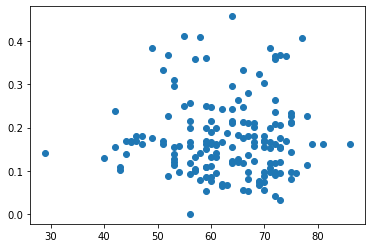

In [16]:
plt.scatter(df_final.popularity,df_final.pos)

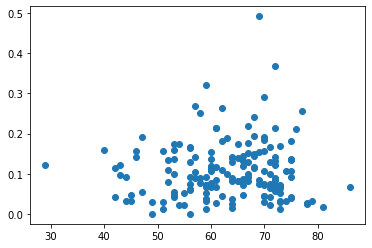

In [17]:
plt.scatter(df_final.popularity,df_final.neg)

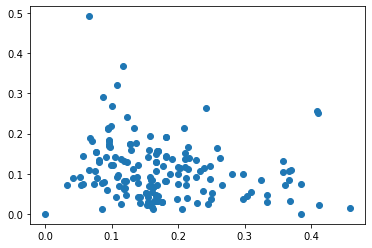

In [18]:
plt.scatter(df_final.pos,df_final.neg)

In [19]:
# maybe songs with more emotion (in either direction) lead to higher popularity
#make word clouds

In [20]:
df_final.sort_values("pos", ascending=False)[0:5]

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,0,1,2,3,4,5,6,7,8,9
148,Love Yourself: Answer,2018-08-24,Trivia: Love,is this love\nis this love\nsometimes i know\n...,RM,64,0.014,0.528,0.458,0.9999,"(live, 23)","(&, 12)","(person, 8)","(youre, 8)","(human, 7)","(make, 6)","(humans, 6)","(desire, 6)","(pride, 6)","(know, 5)"
15,"O!RUL8,2?",2013-09-11,OUTRO: LUV IN SKOOL,i just wanna love ya\ni just wanna love ya\nit...,JUNGKOOK; V; JIMIN; JIN,55,0.023,0.565,0.412,0.9973,"(love, 10)","(wan, 8)","(na, 8)","(ya, 8)","(baby, 8)","(feel, 5)","(like, 5)","(still, 4)","(dream, 4)","(girl, 4)"
166,Love Yourself: Answer,2018-08-24,FAKE LOVE (Rocking Vibe Mix),"for you, i could pretend like i was happy when...",BTS,58,0.250,0.340,0.410,0.9996,"(fake, 22)","(could, 9)","(im, 9)","(know, 8)","(bad, 8)","(mad, 8)","(like, 7)","(cant, 7)","(pretend, 6)","(wish, 6)"
133,Love Yourself: Tear,2018-05-18,Fake Love,"for you, i could pretend like i was happy when...",BTS,77,0.255,0.337,0.408,0.9995,"(fake, 22)","(could, 9)","(im, 9)","(know, 8)","(bad, 8)","(mad, 8)","(like, 7)","(cant, 7)","(pretend, 6)","(wish, 6)"
77,The Most Beautiful Moment In Life: Young Forever,2016-05-02,Save Me,"i want to breathe, i hate this night\ni want t...",BTS,71,0.074,0.541,0.385,0.9993,"(give, 12)","(fall, 12)","(hand, 11)","(need, 6)","(love, 6)","(want, 4)","(please, 4)","(tonight, 4)","(wake, 3)","(within, 3)"


In [21]:
df_final.sort_values("neg", ascending=False)[0:5]

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,0,1,2,3,4,5,6,7,8,9
186,MAP OF THE SOUL: 7,2020-02-21,UGH!,"let's go, yeah, yeah, yeah\n\ncrackle, that em...",RM; SUGA; J-HOPE,69,0.492,0.443,0.066,-0.9999,"(rage, 21)","(go, 19)","(yeah, 17)","(rag, 16)","(ahem, 16)","(im, 12)","(become, 8)","(boom, 6)","(malice, 6)","(fill, 6)"
126,Love Yourself: Her,2017-09-18,Dimple,you hide but only appear when you smile\nwhere...,BTS,72,0.368,0.515,0.117,-0.9988,"(dangerous, 8)","(ille~gal, 8)","(dimple, 6)","(illegal, 6)","(oh, 5)","(angel, 4)","(want, 4)","(smile, 3)","(see, 3)","(yes, 3)"
101,WINGS,2016-10-10,Am I Wrong,"am i wrong, fallin' in love with you\ntell me ...",BTS,59,0.320,0.572,0.108,-0.9989,"(go, 24)","(wrong, 17)","(oh, 12)","(ready, 6)","(worlds, 5)","(world, 4)","(yeah, 4)","(seem, 4)","(like, 4)","(dont, 3)"
120,You Never Walk Alone,2017-02-13,Not Today,all the underdogs in the world\na day may come...,BTS,70,0.291,0.621,0.087,-0.9990,"(hey, 18)","(dont, 14)","(hand, 12)","(die, 8)","(gun, 8)","(ready, 8)","(believe, 8)","(fire, 7)","(everyone, 6)","(day, 5)"
66,The Most Beautiful Moment In Life Pt.2,2015-09-30,Outro: House of Cards,"again insecure, in danger again\nso bad why, w...",BTS,57,0.268,0.632,0.100,-0.9900,"(even, 9)","(collapse, 4)","(house, 4)","(make, 4)","(card, 4)","(end, 4)","(like, 4)","(cant, 3)","(time, 3)","(hard, 2)"


In [22]:
np.corrcoef(df_final[["neg", "neu", "pos", "compound", "popularity"]], rowvar = False)
#potentially high correlation between sentiment scores

array([[ 1.00000000e+00, -5.44492360e-01, -1.86903155e-01,
        -6.01755063e-01,  5.89558453e-02],
       [-5.44492360e-01,  1.00000000e+00, -7.22203480e-01,
        -5.26689867e-02, -4.24102571e-02],
       [-1.86903155e-01, -7.22203480e-01,  1.00000000e+00,
         5.57627735e-01,  7.93795255e-04],
       [-6.01755063e-01, -5.26689867e-02,  5.57627735e-01,
         1.00000000e+00, -8.77011274e-02],
       [ 5.89558453e-02, -4.24102571e-02,  7.93795255e-04,
        -8.77011274e-02,  1.00000000e+00]])

## Most Popular Words Analysis

In [23]:
df_final.rename(columns = {0:'pop1',1:'pop2',2:'pop3',3:'pop4',4:'pop5',5:'pop6',6:'pop7',7:'pop8',8:'pop9',9:'pop10'}, inplace = True)

In [24]:
df_final.reset_index(drop=True,inplace=True)

In [25]:
df_final.head()

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,pop1,pop2,pop3,pop4,pop5,pop6,pop7,pop8,pop9,pop10
0,NaN,2021-06-04,Butter,Smooth like butter\nLike a criminal undercover...,BTS,86,0.068,0.769,0.162,0.9864,"(get, 15)","(right, 11)","(i, 9)","(let, 9)","(leave, 7)","(beat, 7)","(side, 6)","(step, 6)","(roll, 6)","(butter, 5)"
1,MAP OF THE SOUL: PERSONA,2019-04-12,Boy With Luv ft. Halsey,(oh-oh-oh-oh-oh)\n(oh-oh-oh-oh-oh)\n(oh-oh-oh-...,BTS,81,0.018,0.820,0.161,0.9947,"(yeah, 15)","(want, 12)","(boy, 11)","(luv, 7)","(something, 6)","(stronger, 6)","(moment, 6)","(love, 6)","(everything, 5)","(high, 5)"
2,Dynamite (DayTime Version),2020-08-28,Dynamite,"Cause I, I, I'm in the stars tonight\nSo watch...",BTS,79,0.033,0.804,0.163,0.9946,"(im, 14)","(dynamite, 14)","(i, 13)","(like, 13)","(oh, 12)","(so, 11)","(dyn, 10)","(light, 9)","(alight, 7)","(life, 7)"
3,Love Yourself: Answer,2018-08-24,Euphoria,you are the sunlight that rose again in my lif...,JUNGKOOK,78,0.027,0.745,0.228,0.9967,"(dream, 10)","(im, 8)","(hand, 7)","(take, 6)","(cause, 6)","(place, 5)","(dont, 4)","(get, 4)","(go, 4)","(hear, 3)"
4,MAP OF THE SOUL: 7,2020-02-21,Filter,"that uninterested face of yours, the bored tip...",JIMIN,78,0.025,0.861,0.114,0.9688,"(filter, 8)","(pick, 6)","(yeah, 4)","(oh, 4)","(new, 4)","(im, 4)","(look, 3)","(ill, 3)","(world, 3)","(want, 3)"


In [26]:
df_final.drop([130],inplace=True)

In [27]:
df_final.reset_index(drop=True,inplace=True)

In [28]:
most_pop_word=[]
most_pop_word2=[]
most_pop_word3=[]
most_pop_word4=[]
most_pop_word5=[]
for i in range(len(df_final)):
    most_pop_word.append(df_final.pop1[i][0])
    most_pop_word2.append(df_final.pop2[i][0])
    most_pop_word3.append(df_final.pop3[i][0])
    most_pop_word4.append(df_final.pop4[i][0])
    most_pop_word5.append(df_final.pop5[i][0])

In [29]:
len(np.unique(np.array(most_pop_word+most_pop_word2+most_pop_word3)))

228

In [30]:
df_final["most_pop_word"]=most_pop_word
df_final["most_pop_word2"]=most_pop_word2
df_final["most_pop_word3"]=most_pop_word3
df_final["most_pop_word4"]=most_pop_word4
df_final["most_pop_word5"]=most_pop_word5

In [31]:
df_final.head()

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,...,pop6,pop7,pop8,pop9,pop10,most_pop_word,most_pop_word2,most_pop_word3,most_pop_word4,most_pop_word5
0,NaN,2021-06-04,Butter,Smooth like butter\nLike a criminal undercover...,BTS,86,0.068,0.769,0.162,0.9864,...,"(beat, 7)","(side, 6)","(step, 6)","(roll, 6)","(butter, 5)",get,right,i,let,leave
1,MAP OF THE SOUL: PERSONA,2019-04-12,Boy With Luv ft. Halsey,(oh-oh-oh-oh-oh)\n(oh-oh-oh-oh-oh)\n(oh-oh-oh-...,BTS,81,0.018,0.820,0.161,0.9947,...,"(stronger, 6)","(moment, 6)","(love, 6)","(everything, 5)","(high, 5)",yeah,want,boy,luv,something
2,Dynamite (DayTime Version),2020-08-28,Dynamite,"Cause I, I, I'm in the stars tonight\nSo watch...",BTS,79,0.033,0.804,0.163,0.9946,...,"(so, 11)","(dyn, 10)","(light, 9)","(alight, 7)","(life, 7)",im,dynamite,i,like,oh
3,Love Yourself: Answer,2018-08-24,Euphoria,you are the sunlight that rose again in my lif...,JUNGKOOK,78,0.027,0.745,0.228,0.9967,...,"(place, 5)","(dont, 4)","(get, 4)","(go, 4)","(hear, 3)",dream,im,hand,take,cause
4,MAP OF THE SOUL: 7,2020-02-21,Filter,"that uninterested face of yours, the bored tip...",JIMIN,78,0.025,0.861,0.114,0.9688,...,"(im, 4)","(look, 3)","(ill, 3)","(world, 3)","(want, 3)",filter,pick,yeah,oh,new


In [32]:
df_subset=df_final[["popularity","most_pop_word"]]
df_subset.head()

,popularity,most_pop_word
0,86,get
1,81,yeah
2,79,im
3,78,dream
4,78,filter


In [33]:
most_pop_songs_by_word=df_subset.groupby(['most_pop_word']).mean()
most_pop_songs_by_word.sort_values("popularity",ascending=False)

,popularity
most_pop_word,
filter,78.0
dream,78.0
bring,76.0
little,75.0
thang,75.0
...,...
cool,51.0
go,51.0
monster,44.0


In [34]:
df_ml=df_final.drop(columns=["pop1","pop2","pop3","pop4","pop5","pop6","pop7","pop8","pop9","pop10"])

In [35]:
df_ml.head()

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,most_pop_word,most_pop_word2,most_pop_word3,most_pop_word4,most_pop_word5
0,NaN,2021-06-04,Butter,Smooth like butter\nLike a criminal undercover...,BTS,86,0.068,0.769,0.162,0.9864,get,right,i,let,leave
1,MAP OF THE SOUL: PERSONA,2019-04-12,Boy With Luv ft. Halsey,(oh-oh-oh-oh-oh)\n(oh-oh-oh-oh-oh)\n(oh-oh-oh-...,BTS,81,0.018,0.820,0.161,0.9947,yeah,want,boy,luv,something
2,Dynamite (DayTime Version),2020-08-28,Dynamite,"Cause I, I, I'm in the stars tonight\nSo watch...",BTS,79,0.033,0.804,0.163,0.9946,im,dynamite,i,like,oh
3,Love Yourself: Answer,2018-08-24,Euphoria,you are the sunlight that rose again in my lif...,JUNGKOOK,78,0.027,0.745,0.228,0.9967,dream,im,hand,take,cause
4,MAP OF THE SOUL: 7,2020-02-21,Filter,"that uninterested face of yours, the bored tip...",JIMIN,78,0.025,0.861,0.114,0.9688,filter,pick,yeah,oh,new


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  3.,  0.,  5.,  5.,
         8., 11.,  8.,  2.,  3.,  2.,  6.,  4., 15.,  3., 11.,  6.,  5.,
        13.,  9., 10.,  2.,  8.,  4.,  6.,  8.,  6., 15.,  8., 10.,  8.,
         2.,  7.,  1.,  3.,  1.,  0.,  1.,  0.,  0.,  0.,  2.]),
 array([29.  , 30.14, 31.28, 32.42, 33.56, 34.7 , 35.84, 36.98, 38.12,
        39.26, 40.4 , 41.54, 42.68, 43.82, 44.96, 46.1 , 47.24, 48.38,
        49.52, 50.66, 51.8 , 52.94, 54.08, 55.22, 56.36, 57.5 , 58.64,
        59.78, 60.92, 62.06, 63.2 , 64.34, 65.48, 66.62, 67.76, 68.9 ,
        70.04, 71.18, 72.32, 73.46, 74.6 , 75.74, 76.88, 78.02, 79.16,
        80.3 , 81.44, 82.58, 83.72, 84.86, 86.  ]),
 <a list of 50 Patch objects>)

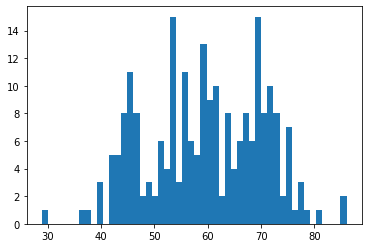

In [45]:
plt.hist(popular, bins = 50)

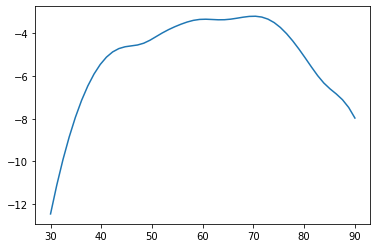

In [94]:
from sklearn.neighbors.kde import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(np.array(df_final.popularity[:len(df_final)-1]).reshape(-1,1))
s = np.linspace(30,90)
e = kde.score_samples(s.reshape(-1,1))
plt.plot(s, e)

In [95]:
from scipy.signal import argrelextrema
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
print("Minima:", s[mi])
print("Maxima:", s[ma])

Minima: [63.06122449]
Maxima: [60.6122449  70.40816327]


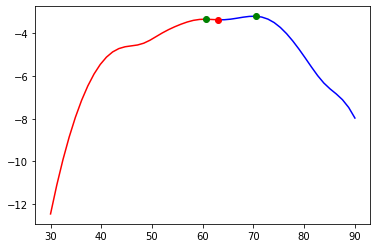

In [99]:
plt.plot(s[:mi[0]+1], e[:mi[0]+1], 'r',
     s[mi[0]:], e[mi[0]:], 'b',
     s[ma], e[ma], 'go',
     s[mi], e[mi], 'ro')

In [100]:
clusters = []
for i in range(len(df_final.popularity)):
    if df_final.popularity[i] < 63.06122449:
        clusters.append("low")
    else: clusters.append("high")

In [101]:
clusters

['high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 '

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final[["neg", "neu", "pos"]], clusters, test_size=0.3)

In [105]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.34


In [112]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.44


In [113]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.38


In [114]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.38


In [115]:
print(metrics.confusion_matrix(y_test,y_pred))

[[13 20]
 [11  6]]


In [109]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

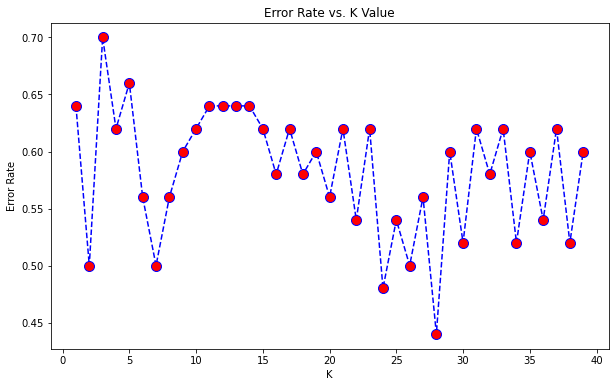

In [111]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [70]:
X = df_final[["neg"]]
y = df_final.popularity
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, y)

LinearRegression()

In [71]:
regr.coef_

array([7.02387944])

In [72]:
regr.score(X,y)

0.0028022435726104966

In [57]:
df_final.popularity

0      86
1      81
2      79
3      78
4      78
       ..
159    43
160    42
161    42
162    40
163    29
Name: popularity, Length: 164, dtype: int64

In [58]:
df_final.head()

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,...,pop6,pop7,pop8,pop9,pop10,most_pop_word,most_pop_word2,most_pop_word3,most_pop_word4,most_pop_word5
0,NaN,2021-06-04,Butter,Smooth like butter\nLike a criminal undercover...,BTS,86,0.068,0.769,0.162,0.9864,...,"(beat, 7)","(side, 6)","(step, 6)","(roll, 6)","(butter, 5)",get,right,i,let,leave
1,MAP OF THE SOUL: PERSONA,2019-04-12,Boy With Luv ft. Halsey,(oh-oh-oh-oh-oh)\n(oh-oh-oh-oh-oh)\n(oh-oh-oh-...,BTS,81,0.018,0.820,0.161,0.9947,...,"(stronger, 6)","(moment, 6)","(love, 6)","(everything, 5)","(high, 5)",yeah,want,boy,luv,something
2,Dynamite (DayTime Version),2020-08-28,Dynamite,"Cause I, I, I'm in the stars tonight\nSo watch...",BTS,79,0.033,0.804,0.163,0.9946,...,"(so, 11)","(dyn, 10)","(light, 9)","(alight, 7)","(life, 7)",im,dynamite,i,like,oh
3,Love Yourself: Answer,2018-08-24,Euphoria,you are the sunlight that rose again in my lif...,JUNGKOOK,78,0.027,0.745,0.228,0.9967,...,"(place, 5)","(dont, 4)","(get, 4)","(go, 4)","(hear, 3)",dream,im,hand,take,cause
4,MAP OF THE SOUL: 7,2020-02-21,Filter,"that uninterested face of yours, the bored tip...",JIMIN,78,0.025,0.861,0.114,0.9688,...,"(im, 4)","(look, 3)","(ill, 3)","(world, 3)","(want, 3)",filter,pick,yeah,oh,new


In [59]:
df_final.tail()

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,...,pop6,pop7,pop8,pop9,pop10,most_pop_word,most_pop_word2,most_pop_word3,most_pop_word4,most_pop_word5
159,"O!RUL8,2?",2013-09-11,Skit: R U Happy Now?,v: sleeping as soon as he gets in the car…\nrm...,BTS,43,0.122,0.778,0.101,-0.9277,...,"(really, 6)","(rest, 6)","(happy, 6)","(v, 5)","(jin, 4)",go,j,hope,right,jimin
160,BE,2020-11-20,Stay,Was it a dream?\nI think I saw you\nWhen I ope...,JIN; RM; JUNGKOOK,42,0.043,0.801,0.155,0.9780,...,"(the, 4)","(think, 3)","(matter, 3)","(right, 3)","(together, 3)",stay,always,know,yeah,wherever
161,The Most Beautiful Moment In Life Pt.2,2015-09-30,Skit: One Night in a Strange City,"he's always late, should i say something?\n a...",BTS,42,0.114,0.647,0.239,0.9994,...,"(well, 11)","(ah, 10)","(right, 10)","(go, 10)","(dont, 9)",say,hyung,yeah,something,think
162,BE,2020-11-20,Dis-ease,"Mm, uh-oh\nUh, it looks like I lost something\...",BTS,40,0.160,0.710,0.129,-0.9680,...,"(walk, 7)","(like, 6)","(fe, 6)","(my, 5)","(sick, 5)",im,dis,one,disease,dont
163,BE,2020-11-20,Skit,Jin: Billboard No. 1 singer is entering\nJ-hop...,BTS,29,0.121,0.739,0.140,0.9682,...,"(j, 10)","(today, 7)","(jin, 6)","(v, 6)","(jung, 6)",i,rm,suga,1,hope


In [116]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ModuleNotFoundError: No module named 'wordcloud'

# Scratch work

In [32]:
'''
nltk pretrained sentiment analyzer called VALER. Not very good at long compound sentences 
and better for short "social media" posts


shows how negative, positive, the lyrics are 
'''

sia = SentimentIntensityAnalyzer()
sia.polarity_scores(df.lyrics[1])

{'neg': 0.083, 'neu': 0.797, 'pos': 0.121, 'compound': 0.9723}

In [33]:
allWords = nltk.tokenize.word_tokenize(df.lyrics[1])
allWordDist = nltk.FreqDist(w.lower() for w in allWords)
stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)  

In [37]:
mostCommon= allWordDist.most_common(10)
mostCommon2= allWordExceptStopDist.most_common(10)

In [35]:
mostCommon #need to get rid of stop words

[(',', 27),
 ('i', 25),
 ('we', 23),
 ('(', 22),
 (')', 22),
 ('it', 17),
 ('oh', 16),
 ('click', 16),
 ('bang', 16),
 ('’', 14)]

In [38]:
mostCommon2

[(',', 27),
 ('(', 22),
 (')', 22),
 ('oh', 16),
 ('click', 16),
 ('bang', 16),
 ('’', 14),
 ('like', 11),
 ('bulletproof', 10),
 ('sing', 9)]

In [64]:
text = df.lyrics[1]
text = text.replace(',',"")
text = text.replace('(',"")
text = text.replace(')',"")
text = text.replace('\'',"")
text = text.replace('’',"")
text = text.replace('?',"")


text_tokens = word_tokenize(text)

text_tokens

tokens_without_sw = [word for word in text_tokens if not word in stopwords]

print(tokens_without_sw)

['give', 'nervous', 'one', 'end', 'bulletproof', 'bulletproof', 'bulletproof', 'name', 'jungkook', 'scale', 'nationwide', 'pulled', 'all-nighters', 'practice', 'rooms', 'instead', 'school', 'dancing', 'singing', 'guys', 'partied', 'gave', 'sleep', 'dreams', 'spent', 'night', 'holding', 'pen', 'closing', 'eyes', 'morning', 'sun', 'rises', 'limit', 'broken', 'double', 'standards', 'many', 'oppositions', 'got', 'lucky', 'contacted', 'agency', 'yall', 'called', 'rappers', 'cant', 'sing', 'rapper', 'title', 'extravagance', 'everywhere', 'go', 'everything', 'show', 'much', 'sharpened', 'sword', 'people', 'looked', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'hey', 'shout', 'oh', '!', 'throw', 'stone', 'youve', 'done', 'much', 'go', 'hard', 'fear', 'click', 'click', 'bang', 'bang', 'sing', 'like', 'click', 'click', 'bang', 'bang', 'sing', 'like', 'oh', '!', 'throw', 'stone', 'youve', 'done', 'much', 'go', 'hard', 'fear', 'click', 'click', 'bang', 'bang', 'sing', 'like', 'click', 'click', 'bang', 'ban

In [49]:
# counter = collections.Counter(tokens_without_sw)
# print(counter.most_common())

[('oh', 16), ('click', 16), ('bang', 16), ('like', 11), ('bulletproof', 10), ('sing', 9), ('go', 6), ('much', 6), ('!', 4), ('throw', 4), ('stone', 4), ('youve', 4), ('done', 4), ('hard', 4), ('fear', 4), ('give', 3), ('nervous', 3), ('guys', 2), ('rapper', 2), ('everywhere', 2), ('everything', 2), ('show', 2), ('sharpened', 2), ('sword', 2), ('people', 2), ('looked', 2), ('hey', 2), ('shout', 2), ('look', 2), ('nothing', 2), ('still', 2), ('monster', 2), ('impossible', 2), ('jungkook', 1), ('scale', 1), ('nationwide', 1), ('pulled', 1), ('all-nighters', 1), ('practice', 1), ('rooms', 1), ('instead', 1), ('school', 1), ('dancing', 1), ('singing', 1), ('partied', 1), ('gave', 1), ('sleep', 1), ('dreams', 1), ('spent', 1), ('night', 1), ('holding', 1), ('pen', 1), ('closing', 1), ('eyes', 1), ('morning', 1), ('sun', 1), ('rises', 1), ('limit', 1), ('broken', 1), ('double', 1), ('standards', 1), ('many', 1), ('oppositions', 1), ('got', 1), ('lucky', 1), ('contacted', 1), ('agency', 1), ('

In [50]:
top10=(counter.most_common()[1:10])

In [51]:
top10_df=pd.DataFrame(top10)
top10_df
top10_df.rename(columns={0: "word", 1: "frequency"},inplace=True)

<BarContainer object of 9 artists>

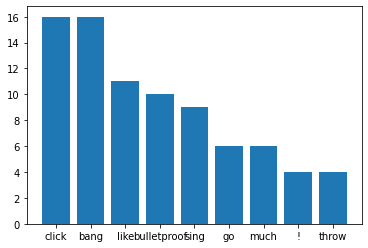

In [52]:
plt.bar(top10_df.word,top10_df.frequency)

In [28]:
df2=pd.read_csv("updated_Spotify_BTS_AudioFeatures.csv")
df2.head()

,Unnamed: 0,Index,Title,Artist,Release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,popularity
0,0,1,Like,BTS,2013/6/12,0.582,0.726,0,-4.174,0,0.1160,0.27100,0.000000,0.227,0.768,100.450,1HQHuPpr2s2z3VIBTLtUmv,231883,34
1,1,2,No More Dream,BTS,2013/6/12,0.436,0.869,2,-5.174,1,0.4720,0.01240,0.000002,0.494,0.612,167.766,4frlkLwlnm58ejpNwWjxyl,221593,32
2,2,3,We Are Bulletproof Pt.2,BTS,2013/6/12,0.754,0.952,8,-5.110,0,0.1530,0.00945,0.000006,0.189,0.868,144.051,2Kspa0jD2MSkaEdonf4Cnb,225360,31
3,3,4,Attack on Bangtan,BTS,2013/9/11,0.722,0.961,11,-2.548,0,0.2670,0.20300,0.000000,0.121,0.678,118.016,6bCoSWW1zyQrwQDSMEmsVy,247160,8
4,4,5,Coffee,BTS,2013/9/11,0.652,0.794,0,-6.604,1,0.0957,0.00808,0.000000,0.298,0.545,92.045,0Tb8sBQ9fseZbDRzRSxTdi,261453,10


In [12]:
df3=pd.read_csv("bts_song_features_224.csv")
df3.head(20)

,Unnamed: 0,id,name,popularity
0,0,1UlnDZ5ubsSX3xrXu063dZ,Intro: 2 Cool 4 Skool,51
1,1,5pjHS3EpHurMyIpB2QBnEd,We Are Bulletproof Pt.2,65
2,2,4Ut6UU8Yyihz1jCZWSCQpu,Skit: Circle Room Talk,44
3,3,089PFeXotzDLNQz9NCk6pF,No More Dream,66
4,4,2QVXLAI2Io3tDmhFOSumr0,Interlude,51
5,5,55Ctj6nVfobn9AcPe6sLG2,Like,74
6,6,1GPIdEcxPjPIYGmN08b1yf,Outro: Circle Room Cypher,47
7,7,3FdanLGasOj37Xi316GfZ4,"Intro: O!RUL8,2?",51
8,8,7JosxtkCqIQieNWXA2Dj3v,N.O,60
9,9,29vOLabxvytbI8fX9xgTaD,We On,56


In [211]:
df=pd.read_csv("lyrics-v5.csv")

In [212]:
df.drop([7,8],inplace=True)
df.reset_index(inplace=True)
df.id = df.id.astype(float)
df.id[75]=81.5
df.sort_values(by=['id'],inplace=True)
df.drop([136,137,149],inplace=True)
df.reset_index(drop=True,inplace=True)
df.drop([172,180],inplace=True)
df.reset_index(inplace=True)
df.id[185]=191.5
df.sort_values(by=['id'],inplace=True)
df.id[213]=205.2
df.id[214]=205.3
df.id[215]=205.4
df.id[216]=205.5
df.id[217]=205.6
df.id[218]=205.7
df.id[219]=205.8
df.id[220]=205.9
df.sort_values(by=['id'],inplace=True)
df.reset_index(drop=True)
df.drop(columns=['level_0','index','id'],inplace=True)

/var/folders/d0/r5_rt10j15j98xny820n56kw0000gp/T/ipykernel_5507/878152620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[75]=81.5
/var/folders/d0/r5_rt10j15j98xny820n56kw0000gp/T/ipykernel_5507/878152620.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[185]=191.5
/var/folders/d0/r5_rt10j15j98xny820n56kw0000gp/T/ipykernel_5507/878152620.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[213]=205.2
/var/folde

In [213]:
popular = df3.popularity
df_merged = pd.concat([df,popular], axis = 1)
df_merged.head()

,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver,popularity
0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False,51
1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False,65
2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False,44
3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False,66
4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,"Butter (Hotter, Sweeter, Cooler) - EP",NaN,2021-06-04,1,Butter,NaN,Butter,Smooth like butter\nLike a criminal undercover...,False,False,NaN,BTS,False,ENG,False,86
220,"Butter (Hotter, Sweeter, Cooler) - EP",NaN,2021-06-04,2,Butter (Hotter Remix),NaN,Butter (Hotter Remix),Smooth like butter\nLike a criminal undercover...,False,False,NaN,BTS,False,ENG,False,61
221,"Butter (Hotter, Sweeter, Cooler) - EP",NaN,2021-06-04,3,Butter (Sweeter Remix),NaN,Butter (Sweeter Remix),Smooth like butter\nLike a criminal undercover...,False,False,NaN,BTS,False,ENG,False,59
222,"Butter (Hotter, Sweeter, Cooler) - EP",NaN,2021-06-04,4,Butter (Cooler Remix),NaN,Butter (Cooler Remix),Smooth like butter\nLike a criminal undercover...,False,False,NaN,BTS,False,ENG,False,60


In [29]:
df_merged = df.merge(df3, left_on=['eng_track_title'], right_on=['name'])
df_merged.head()

,id_x,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver,Unnamed: 0,id_y,name,popularity
0,1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False,1,5pjHS3EpHurMyIpB2QBnEd,We Are Bulletproof Pt.2,65
1,2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False,2,4Ut6UU8Yyihz1jCZWSCQpu,Skit: Circle Room Talk,44
2,3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False,3,089PFeXotzDLNQz9NCk6pF,No More Dream,66
3,4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False,4,2QVXLAI2Io3tDmhFOSumr0,Interlude,51
4,6,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,7,Outro: Circle Room Cypher,NaN,Outro: Circle Room Cypher,"hurry up, hurry-hurry-hurry-hurry-hurry-hurry-...",False,False,NaN,BTS,False,KOR,False,6,1GPIdEcxPjPIYGmN08b1yf,Outro: Circle Room Cypher,47


In [30]:
df_merged.shape

(77, 20)

In [ ]:
test=df.lyrics[1]
wordnet_lemmatizer = WordNetLemmatizer()


text = test
text = text.replace(',',"")
text = text.replace('(',"")
text = text.replace(')',"")
text = text.replace('\'',"")
text = text.replace('’',"")
text = text.replace('?',"")
text = text.replace('*',"")
text = text.replace('.',"")
text = text.replace('!',"")

allWords = nltk.tokenize.word_tokenize(text)


allWords2=[]

for word in allWords:
    #print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos="v")))
    allWords2.append(wordnet_lemmatizer.lemmatize(word, pos="v"))